## Ejercicio 2
En esta parte tendrás que hacer dos cosas, crear una presentación sobre el titanic de no más de 6 slides, sin incluir portada, con los siguientes mensajes y su apoyo en datos:  


 



In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import bootcampviztools as bvt

In [16]:
df_titanic = pd.read_csv("./data/titanic.csv")
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          714 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     889 non-null    object 
 8   class        891 non-null    object 
 9   who          891 non-null    object 
 10  adult_male   891 non-null    bool   
 11  deck         203 non-null    object 
 12  embark_town  889 non-null    object 
 13  alive        891 non-null    object 
 14  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(7)
memory usage: 92.4+ KB


In [17]:
df_titanic.drop(columns="deck", inplace=True)

In [18]:
es_woman = df_titanic.who == 'woman'
es_child = df_titanic.who == 'child'
es_man = df_titanic.who == 'man'

media_woman = df_titanic.loc[es_woman, 'age'].mean()
media_child = df_titanic.loc[es_child, 'age'].mean()
media_man = df_titanic.loc[es_man, 'age'].mean()

es_age_nulo = df_titanic.age.isna()

df_titanic.loc[es_woman & es_age_nulo, 'age'] = media_woman
df_titanic.loc[es_child & es_age_nulo, 'age'] = media_child
df_titanic.loc[es_man & es_age_nulo, 'age'] = media_man

In [19]:
df_titanic = df_titanic.dropna()

In [20]:
df_titanic.isna().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
dtype: int64

### 1- El titanic fue un accidente con una tasa de mortalidad alta.  

In [21]:
alive_abs = df_titanic.alive.value_counts()
alive_rel = df_titanic.alive.value_counts(normalize=True)*100

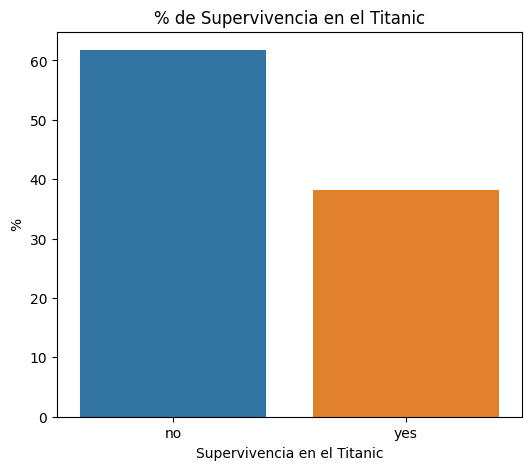

In [22]:
plt.figure(figsize=(6,5))

plt.title("% de Supervivencia en el Titanic")

sns.barplot(x = alive_rel.index,
            y= alive_rel.values,
            hue = alive_rel.index)

plt.xlabel("Supervivencia en el Titanic")
plt.ylabel("%");

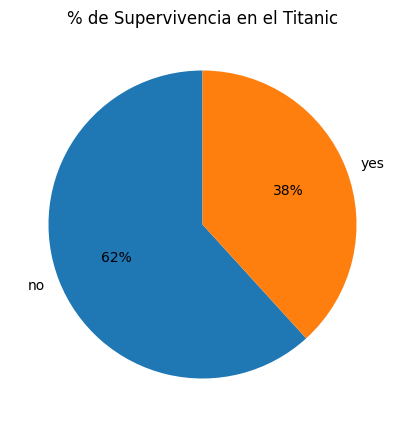

In [23]:
plt.figure(figsize=(6,5))

plt.title("% de Supervivencia en el Titanic")

plt.pie(x = alive_rel.values,
        labels = alive_rel.index,
        autopct='%.f%%',
        startangle=90);

### 2- En esa ocasión los datos apoyan que se dio el "Las mujeres y los niños primero", pero...  

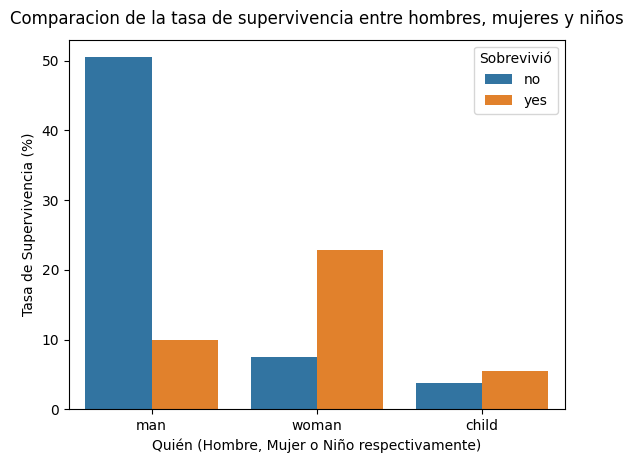

In [52]:
sns.countplot(x='who',
              hue='alive',
              data=df_titanic,
              legend=True,
              stat='percent')

plt.title('Comparacion de la tasa de supervivencia entre hombres, mujeres y niños', y=1.02)

plt.xlabel('Quién (Hombre, Mujer o Niño respectivamente)')
plt.ylabel('Tasa de Supervivencia (%)')
plt.legend(title = 'Sobrevivió')

plt.show()

### 3- ... que la clase en la que se viajes tuvo una influencia significativa y podría explicar... 

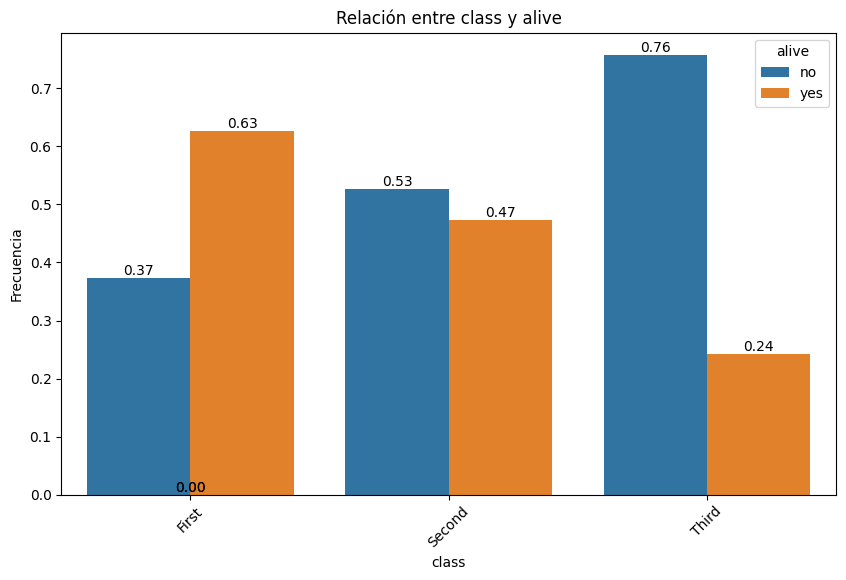

In [25]:
bvt.plot_categorical_relationship_fin(df_titanic, 'class', 'alive',show_values=True, relative_freq=True)

<Figure size 1200x800 with 0 Axes>

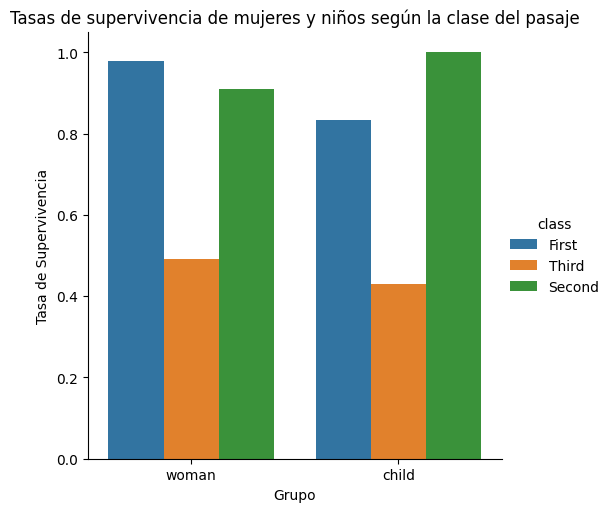

In [64]:
filtrado_titanic = df_titanic[df_titanic['who'].isin(['woman', 'child'])]

plt.figure(figsize=(12, 8))
sns.catplot(data = filtrado_titanic, 
            kind = 'bar', 
            x = 'who', 
            hue = 'class', 
            y = 'survived', 
            errorbar = None)

plt.title('Tasas de supervivencia de mujeres y niños según la clase del pasaje')
plt.xlabel('Grupo')
plt.ylabel('Tasa de Supervivencia')

plt.show()

### 4- ... las diferencias de tasas de supervivencia entre mujeres y niños.    

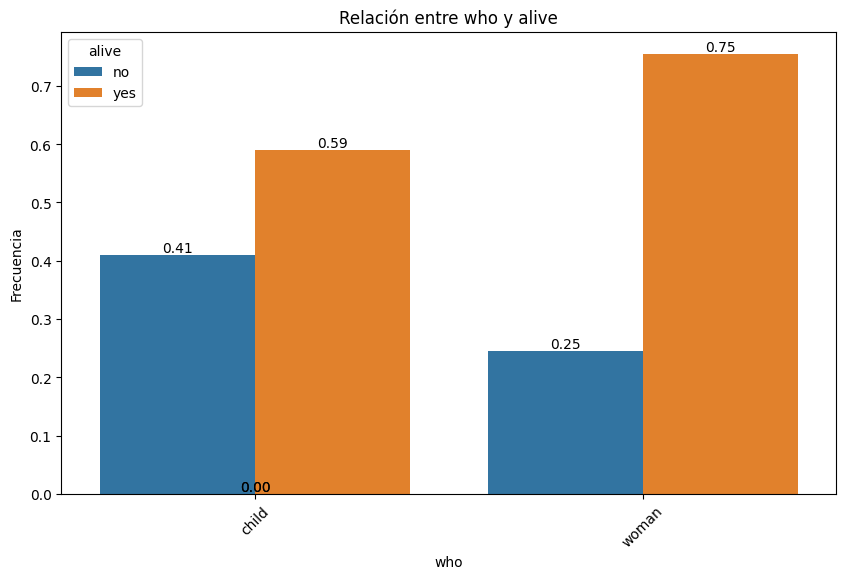

In [27]:
woman_child = df_titanic[(df_titanic['who'] == 'child') | (df_titanic['who'] == 'woman')]

bvt.plot_categorical_relationship_fin(woman_child, 'who', 'alive',show_values=True, relative_freq=True)

### 5- Además aunque el puerto de embarque parece influir, se podría asumir que lo fue el tipo de pasaje que embarcó en cada uno.  

<Figure size 1200x800 with 0 Axes>

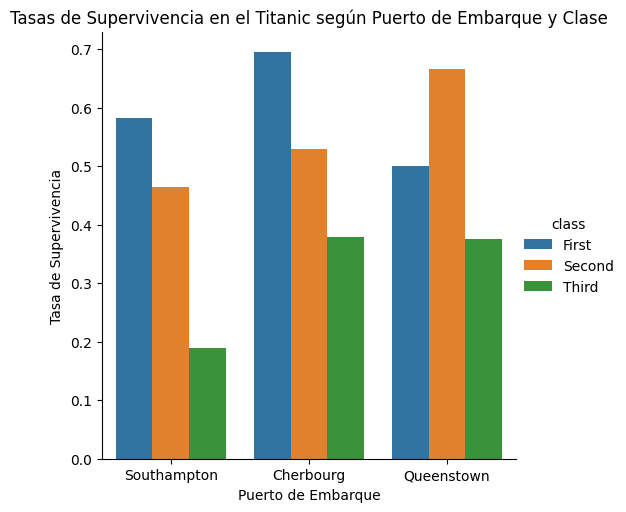

In [68]:
plt.figure(figsize = (12, 8))

sns.catplot(data = df_titanic.sort_values("class"), 
            kind = 'bar', 
            x = 'embark_town', 
            hue = 'class', 
            y = 'survived', 
            errorbar = None)

plt.title('Tasas de Supervivencia en el Titanic según Puerto de Embarque y Clase')
plt.xlabel('Puerto de Embarque')
plt.ylabel('Tasa de Supervivencia')

plt.show();

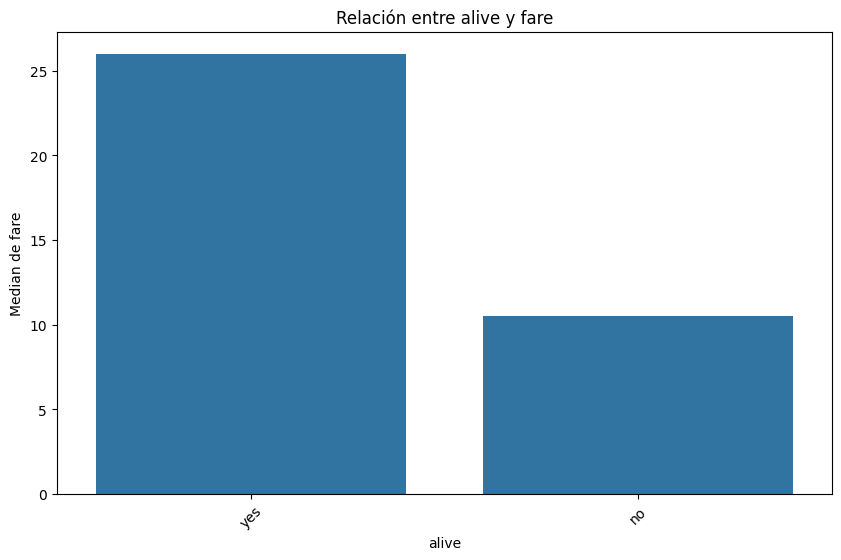

In [32]:
bvt.plot_categorical_numerical_relationship(df_titanic, 'alive', 'fare', measure = 'median')